In [1]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

import pandas as pd 
import numpy as np 
import sklearn
from dir import *
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import train_test_split
from VAE_model import *
from VAE_model_enhanced import *
from VAE_model_2 import *
from VAE_model_single import *
from training import *
from extras import *
import mantel
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
from collections import defaultdict
from scipy.stats import pearsonr, spearmanr
import random
# from skbio.stats.distance import mantel
from sklearn.decomposition import PCA
import pingouin as pg
from sklearn.cluster import KMeans
plt.style.use('ggplot')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
print(f"Current working directory: {current_dir}")
print(f"Parent directory: {parent_dir}")

Current working directory: /Users/anastasiiashcherbakova/git_projects/masters_project/large_dataset_new_loss
Parent directory: /Users/anastasiiashcherbakova/git_projects/masters_project


# 1) Data exploration 

## 1.1) General data exploration

In [3]:
large_data = pd.read_csv(TEN_K_DATASET, index_col=[0], header=[0])

In [4]:
large_data

,41004_G02_contigs_pacbio,50884_F01_contigs_pacbio,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,esc_pa2010aa_as,esc_pa2013aa_as,esc_pa2014aa_as,esc_pa2016aa_as,esc_pa2019aa_as,esc_pa2021aa_as,esc_pa2023aa_as,esc_pa2315aa_as,esc_ra2551aa_as,esc_ra2561aa_as
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
large_data.columns = large_data.columns.str.upper()

In [6]:
large_data

,41004_G02_CONTIGS_PACBIO,50884_F01_CONTIGS_PACBIO,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,ESC_PA2010AA_AS,ESC_PA2013AA_AS,ESC_PA2014AA_AS,ESC_PA2016AA_AS,ESC_PA2019AA_AS,ESC_PA2021AA_AS,ESC_PA2023AA_AS,ESC_PA2315AA_AS,ESC_RA2551AA_AS,ESC_RA2561AA_AS
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
large_data.sum(axis=1).sort_values()

Strain
group_569           1
group_4401_2        1
group_5102          1
group_5100_2        1
group_5099_3        1
                ...  
hldD             7512
group_4462_2     7512
grxC             7512
diaA             7512
Lineage         55565
Length: 55040, dtype: int64

In [8]:
sum(large_data.sum(axis=0) < 4000)

10

In [9]:
phylogroup_data = pd.read_csv(TEN_K_DATASET_PHYLOGROUPS, index_col=[0], header=[0])

In [10]:
phylogroup_data

,Phylogroup
ID,
ESC_CA4458AA_AS,E
ESC_CA5810AA_AS,E
11657_7#79,B2
ESC_SA7073AA_AS,B1
SRS3528668,Not Determined
...,...
39111_C02,Not determined
ESC_SA2343AA_AS,E
ESC_SA2344AA_AS,E


In [11]:
phylogroup_data.value_counts()

Phylogroup    
E                 3428
B2                2311
Not Determined    1708
B1                1535
D                  345
A                  335
Not determined     232
F                  157
Shigella            67
C                   28
Name: count, dtype: int64

In [12]:
data_without_lineage = large_data.drop(index=['Lineage'])
large_data_t = np.array(data_without_lineage.transpose())

print(f"Dataset shape: {large_data_t.shape}")


Dataset shape: (7512, 55039)


In [13]:
threshold_data = []
thresholds = np.linspace(0, 50, num=50)
data_without_lineage = large_data.drop(index=['Lineage'])

for i in thresholds:
    row_sums = data_without_lineage.sum(axis=1)
    threshold_data.append(len(data_without_lineage[row_sums >= i]))


In [14]:
threshold_data

[55039,
 39817,
 34175,
 31251,
 29493,
 28022,
 26984,
 26150,
 25329,
 24655,
 23910,
 23405,
 23055,
 22662,
 22335,
 22042,
 21711,
 21396,
 21133,
 20878,
 20538,
 20274,
 19950,
 19661,
 19396,
 19047,
 18595,
 18291,
 18111,
 17957,
 17835,
 17722,
 17594,
 17461,
 17326,
 17186,
 16983,
 16857,
 16742,
 16609,
 16420,
 16044,
 15885,
 15772,
 15681,
 15576,
 15439,
 15336,
 15223,
 15120]

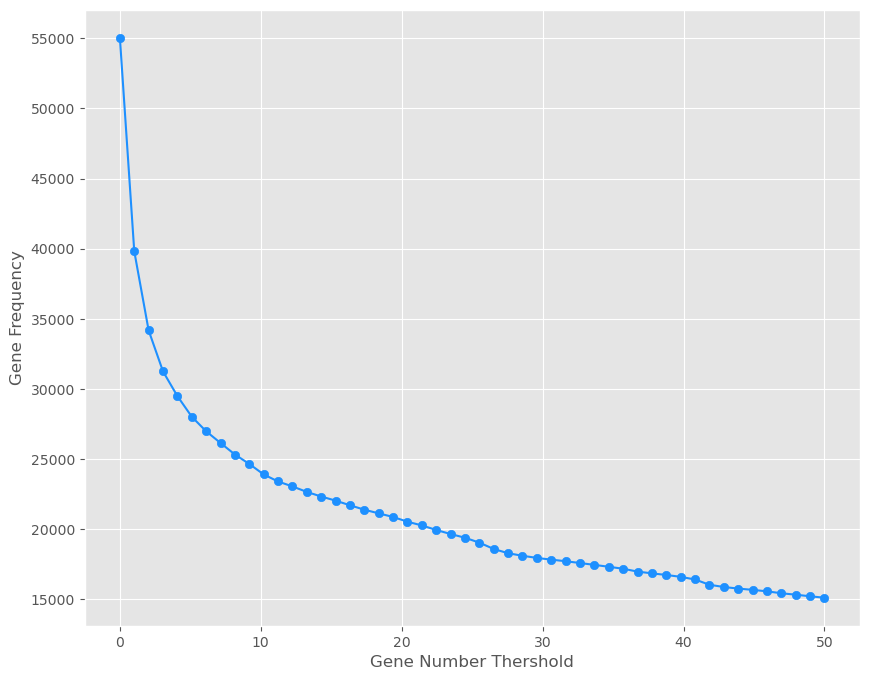

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel("Gene Number Thershold")
plt.ylabel("Gene Frequency")
# plt.savefig("figures/gene_frequency_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
# large_data[row_sums >= 2]


In [17]:
frequency1 = large_data.sum(axis=1)

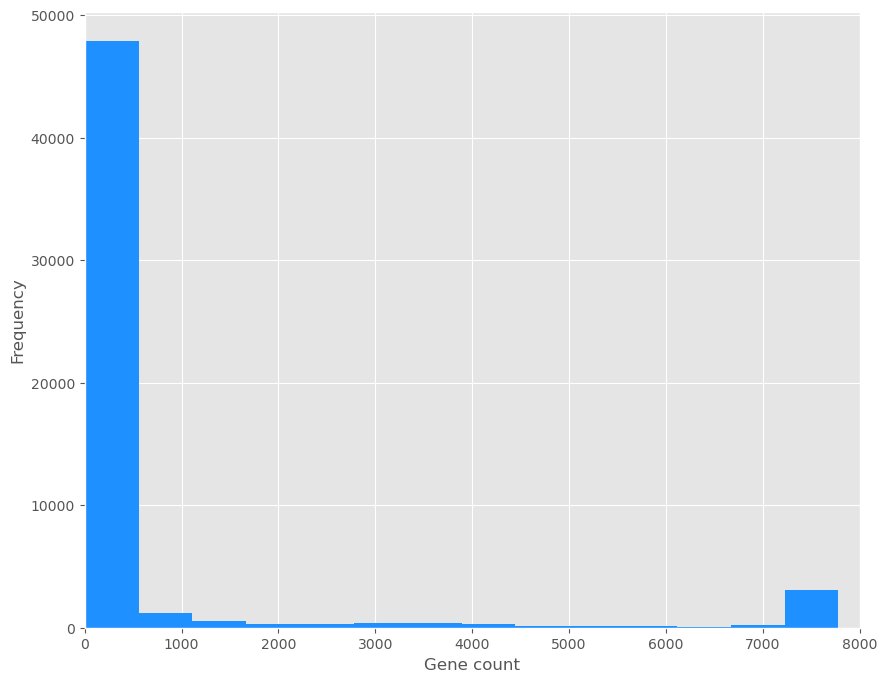

In [18]:
plt.figure(figsize=(10,8))
plt.hist(frequency1, color='dodgerblue', bins=100)
plt.xlim(0, 8000)
plt.xlabel('Gene count')
plt.ylabel('Frequency')
# plt.savefig("figures/gene_count_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [19]:
frequency2 = large_data.sum(0)

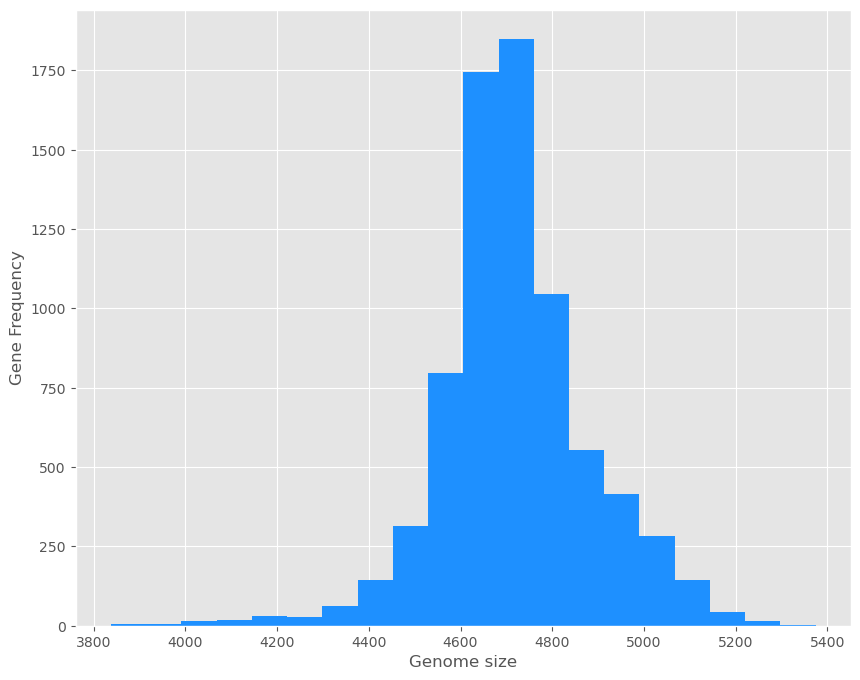

In [20]:
plt.figure(figsize=(10,8))
plt.hist(frequency2, bins=20, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Gene Frequency')
# plt.savefig("figures/genome_size_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [21]:
large_data.sum(0).min()

3838

## 1.2) PCA

In [22]:
# left join (number of samples stays the same but there are 1.5k damples with undetermined phylogroup)
# merged_df = data_without_lineage.transpose().merge(phylogroup_data, how='left', left_index=True, right_index=True)
# inner join (cuts down the number fo samples because overlooks the ones which do not have phylogroup determined)
merged_df = pd.merge(data_without_lineage.transpose(), phylogroup_data, how='inner', left_index=True, right_on='ID')

In [23]:
merged_df

,group_5501,group_4783,group_4456,group_6055,group_2859,group_3832,group_4223,group_2401,group_1236,group_3245,...,group_2066_1,mukF_1,group_955_2,group_1382_5,group_2149_7,group_2067_4,group_2068_8,group_2069_3,group_2071_4,Phylogroup
ID,,,,,,,,,,,,,,,,,,,,,
AIAW00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
AIBY00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
AIFN00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
NC_002655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
NC_002695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESC_PA2021AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
ESC_PA2023AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
ESC_PA2315AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D


In [24]:
merged_df.shape # Why does it decrease by so much? (inner join but still...)

(5953, 55040)

In [25]:
merged_df.iloc[:, :-1]

,group_5501,group_4783,group_4456,group_6055,group_2859,group_3832,group_4223,group_2401,group_1236,group_3245,...,group_1609_5,group_2066_1,mukF_1,group_955_2,group_1382_5,group_2149_7,group_2067_4,group_2068_8,group_2069_3,group_2071_4
ID,,,,,,,,,,,,,,,,,,,,,
AIAW00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIBY00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIFN00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_002655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_002695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESC_PA2021AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ESC_PA2023AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ESC_PA2315AA_AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
merged_df['Phylogroup'] = merged_df['Phylogroup'].fillna('Not determined')

In [27]:
merged_df['Phylogroup'].value_counts()

Phylogroup
E           2496
B2          1982
B1           877
D            299
A            111
F            102
Shigella      63
C             23
Name: count, dtype: int64

In [28]:
# sum(merged_df.index == 'esc_pa2010aa_as')


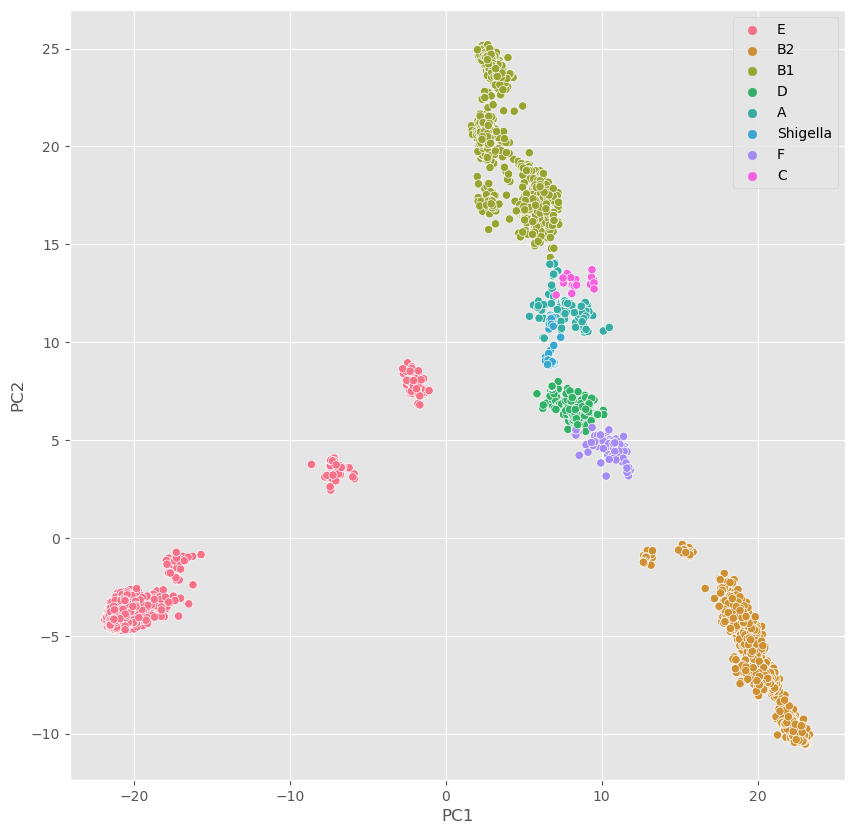

In [29]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_df.iloc[:, :-1])
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = merged_df.Phylogroup.tolist(), data=df_pca)
# plt.savefig("figures/PCA_graph_BD_Phylogroup.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 2) Data preprocessing

## 2.1) Dataset preprocessing 

In [30]:
data_array_t = np.array(merged_df.iloc[:, :-1])
phylogroups_array = np.array(merged_df.iloc[:, -1])

In [31]:
data_array_t.sum(axis=1).min()

3814

In [32]:
data_array_t.shape

(5953, 55039)

In [33]:
phylogroups_array.shape

(5953,)

## 2.2) Conversing the dataset into splits and dataloaders

In [34]:
data_array_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
data_array_t.sum(axis=1)

array([4677, 4580, 4627, ..., 4519, 4870, 4714])

In [36]:
phylogroups_array

array(['E', 'E', 'E', ..., 'D', 'D', 'D'], dtype=object)

In [37]:
# Convert to PyTorch tensor
data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

# Split into train and test sets
train_data, temp_data, train_labels, temp_labels = train_test_split(data_tensor, phylogroups_array, test_size=0.3, random_state=12345)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.3333, random_state=12345)
test_phylogroups = test_labels

batch_size = 32

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)
test_dataset = TensorDataset(test_data)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Dataloader fot a small subset for overfitting (again, for debugging)
small_subset_train_indices = np.random.choice(len(train_dataset), size=256, replace=False)
small_subset_val_indices = np.random.choice(len(train_dataset), size=50, replace=False)
small_train_subset = Subset(train_dataset, small_subset_train_indices)
small_val_subset = Subset(train_dataset, small_subset_val_indices)
small_train_loader = DataLoader(small_train_subset, batch_size=batch_size, shuffle=True)
small_val_loader = DataLoader(small_val_subset, batch_size=batch_size, shuffle=False)


In [38]:
test_data.shape

torch.Size([596, 55039])

In [39]:
len(test_data.sum(axis=1))

596

# 5) Training of full dataset (train_full_dataset.py script on the CS account)

## Full dataset (base model and enhanced model)

In [40]:
# Load trained model 
input_dim = 55039
hidden_dim = 1024
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE(input_dim, hidden_dim, latent_dim)
# model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/2_bigdataset/2_bigdataset/8_final_dataset_new_params/saved_KL_annealing_VAE_BD_100.pt', map_location=torch.device('cpu')))  
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/2_bigdataset/2_bigdataset/8_final_dataset_new_params/saved_KL_annealing_VAE_BD_100.pt', map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[8.3123050e-05 3.2229129e-06 2.0787829e-06 ... 1.7589288e-07
  1.8851844e-07 7.0248967e-07]
 [7.1969284e-03 1.6878225e-04 8.9250877e-04 ... 3.8030466e-05
  4.2998996e-05 4.0536859e-05]
 [1.9573392e-03 6.8345672e-04 7.8530930e-04 ... 1.5323199e-05
  1.9121622e-05 5.7651381e-05]
 ...
 [4.7356160e-03 4.0986814e-07 1.1408423e-06 ... 4.2764345e-06
  4.8907177e-06 1.4945614e-06]
 [2.1683602e-02 4.4627176e-04 3.7686728e-05 ... 4.1741303e-05
  4.3212054e-05 9.7820659e-05]
 [3.4516235e-04 7.9886486e-05 3.3183449e-06 ... 2.7850489e-05
  3.1677242e-05 7.3355848e-05]]


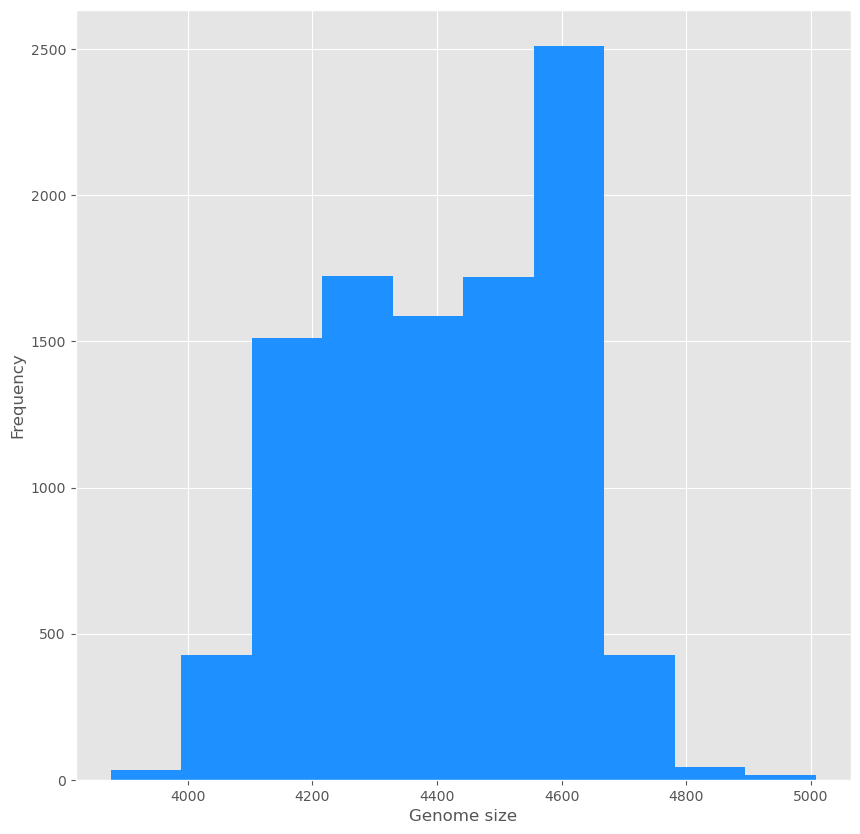

In [41]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_8_final_dataset_new_params.pdf", format="pdf", bbox_inches="tight")

In [42]:
binary_generated_samples.sum(axis=1).min()

3877.0

In [43]:
np.mean(binary_generated_samples.sum(axis=1))

4409.5993

In [44]:
np.median(binary_generated_samples.sum(axis=1))

4421.0

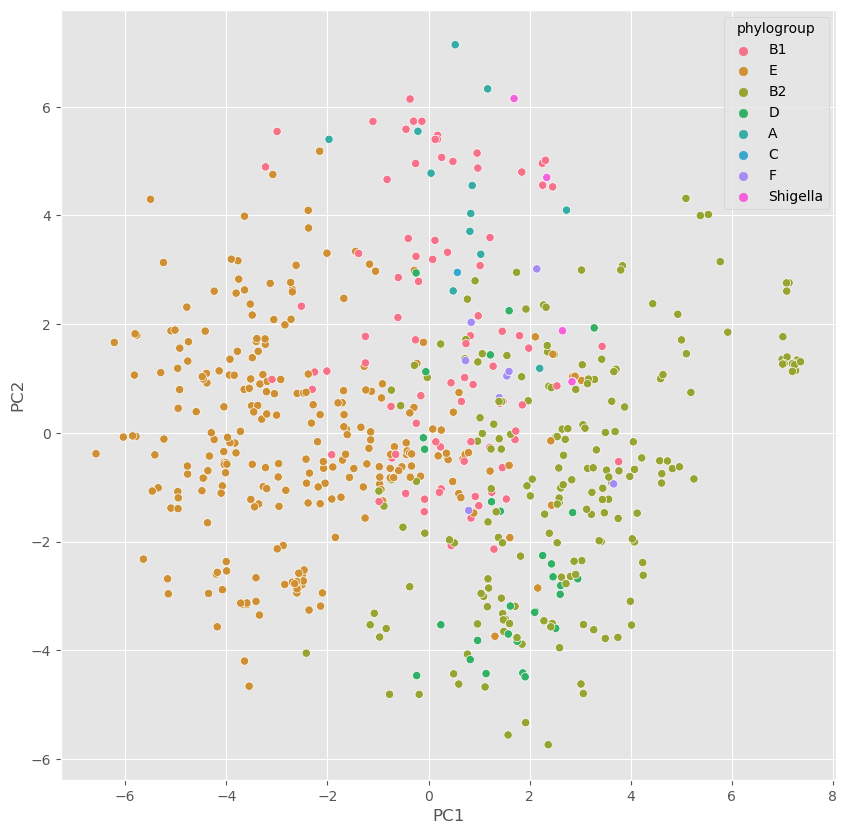

In [45]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

----------

In [46]:
# Load trained model 
input_dim = 55039
hidden_dim = 1024
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE_enhanced(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/2_bigdataset/2_bigdataset/9_final_dataset_enhanced/saved_KL_annealing_VAE_BD_100.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[2.33513787e-02 1.33270732e-04 3.76244745e-04 ... 5.77403989e-05
  5.89219053e-05 3.65981905e-05]
 [1.00358531e-01 6.96019968e-04 7.76871759e-03 ... 3.11802054e-04
  3.38766229e-04 2.77038431e-04]
 [1.88138336e-02 1.11416716e-06 1.17814980e-05 ... 1.40540385e-06
  1.48791855e-06 2.89572085e-06]
 ...
 [2.51026154e-01 2.09766789e-03 1.14610931e-03 ... 2.26000193e-04
  2.28302408e-04 2.01543065e-04]
 [2.19954059e-01 2.52241013e-03 3.93621670e-03 ... 7.27944716e-05
  8.03473231e-05 1.58817682e-04]
 [1.76875154e-03 3.00451320e-05 1.42033869e-05 ... 1.20014047e-05
  1.29802884e-05 1.17076315e-05]]


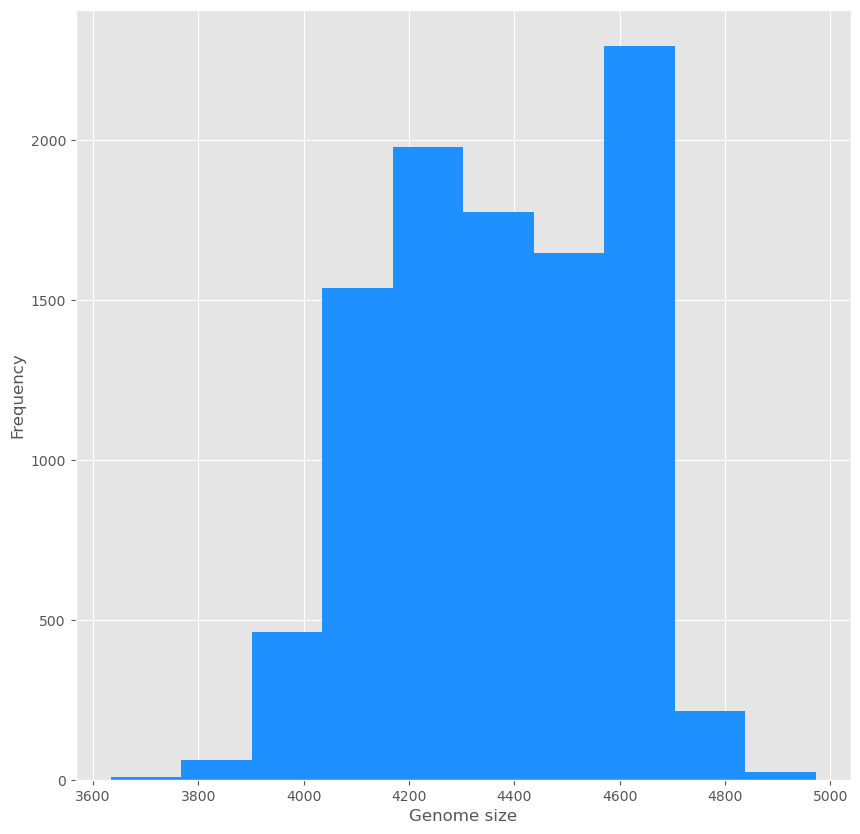

In [47]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_9_final_dataset_enhanced.pdf", format="pdf", bbox_inches="tight")

In [48]:
binary_generated_samples.sum(axis=1).min()

3634.0

In [49]:
np.mean(binary_generated_samples.sum(axis=1))

4373.714

In [50]:
np.median(binary_generated_samples.sum(axis=1))

4372.0

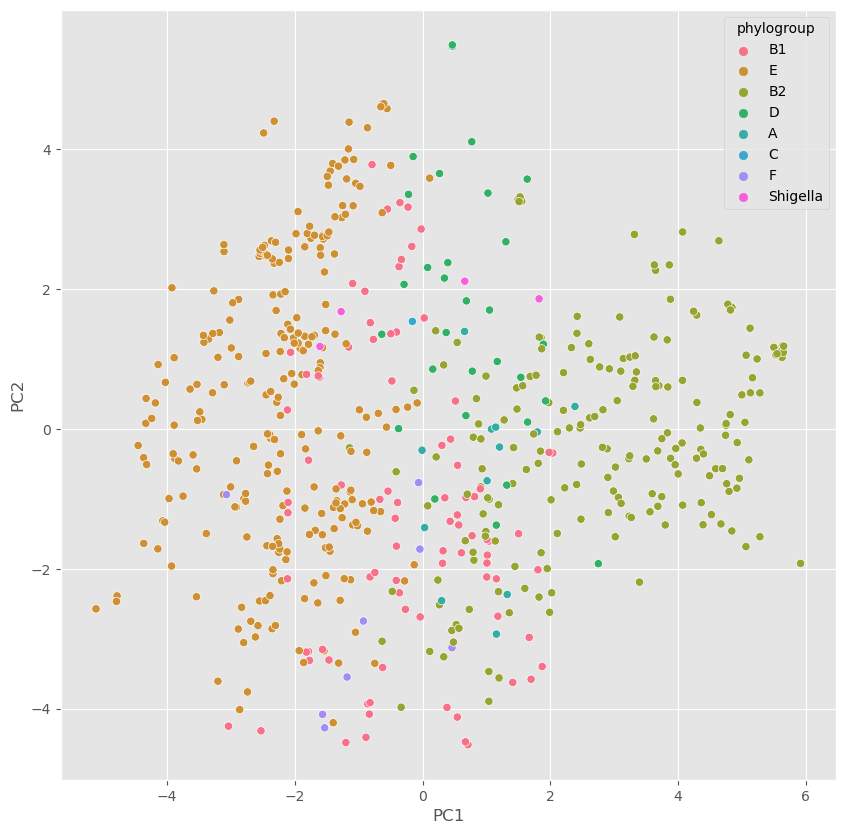

In [51]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Exploring ways to minimise genome size

just ran a test model with random initial parameters to see how it woudl perform with a new loss (gene abundance) included. L1 regularisation applied to the fetures in the model. one note: the new loss gama and beta params: 
beta_start = 0.1
beta_end = 1.0
gamma_start = 1.0
gamma_end = 0.1

In [52]:
# Load trained model 
input_dim = 55039
hidden_dim = 512
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/3_bigdataset_newloss/3_bigdataset_newloss/8_new_loss/saved_KL_annealing_VAE_BD_100.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[1.43489451e-03 1.62582837e-05 8.83575238e-04 ... 6.25110188e-05
  6.05774731e-05 1.29709355e-04]
 [2.43795785e-05 1.37396046e-05 2.04431308e-06 ... 5.01440554e-05
  5.07698132e-05 6.97138312e-05]
 [1.01182894e-04 3.60976992e-04 1.23469203e-04 ... 8.09153062e-05
  8.36207400e-05 8.30804202e-05]
 ...
 [1.54061255e-03 6.96346324e-05 1.50912740e-06 ... 1.03546874e-04
  1.07222302e-04 7.12404653e-05]
 [2.14781165e-02 3.12456425e-04 5.07776218e-04 ... 2.83722966e-05
  2.94715846e-05 3.18789498e-05]
 [4.23373375e-03 2.14085708e-06 1.45387799e-06 ... 1.70170853e-04
  1.70975138e-04 2.72626232e-04]]


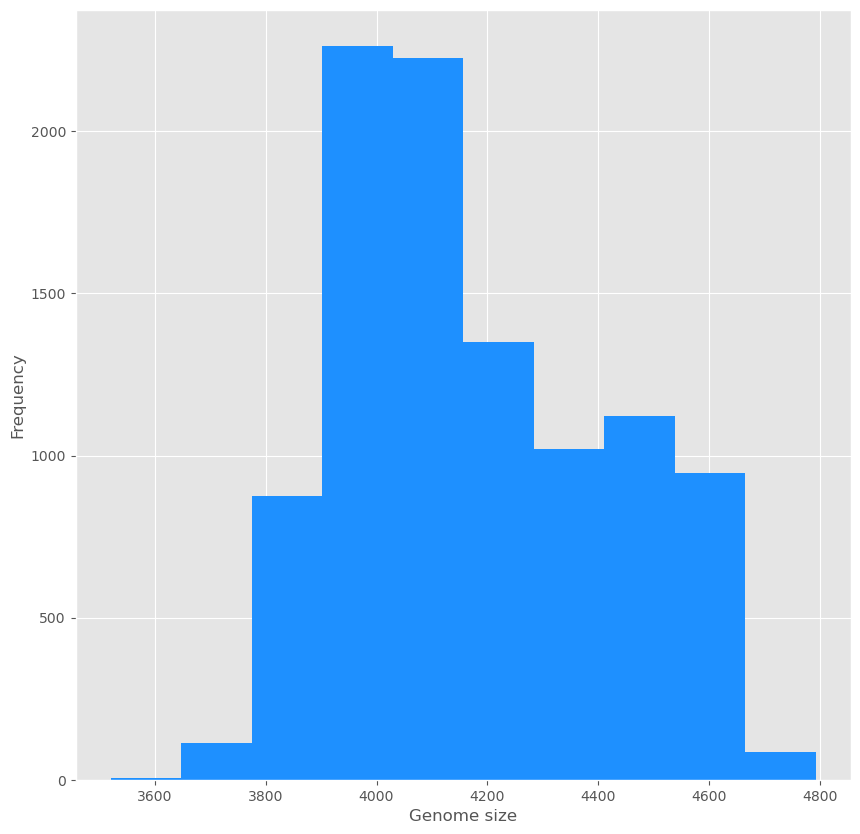

In [53]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_8_new_loss.pdf", format="pdf", bbox_inches="tight")

In [54]:
binary_generated_samples.sum(axis=1).min()

3521.0

In [55]:
np.mean(binary_generated_samples.sum(axis=1))

4176.4915

In [56]:
np.median(binary_generated_samples.sum(axis=1))

4123.0

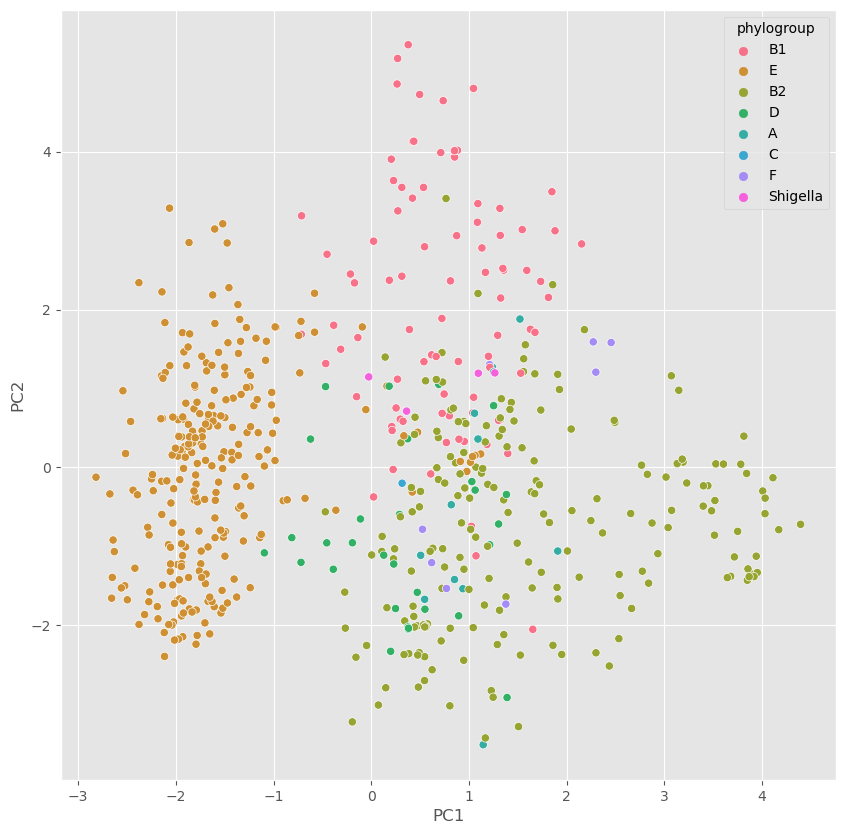

In [57]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

---------

In [58]:
# Load trained model 
input_dim = 55039
hidden_dim = 512
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE_enhanced(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/3_bigdataset_newloss/3_bigdataset_newloss/8_new_loss_enhanced_model/saved_KL_annealing_VAE_BD_100.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[2.78578768e-03 1.44516816e-02 1.19596883e-03 ... 7.88881152e-05
  7.80954651e-05 7.40411415e-05]
 [1.17510654e-05 3.14660610e-05 1.68085389e-04 ... 4.88823898e-05
  4.83974909e-05 4.29365100e-05]
 [1.04947110e-04 9.39861347e-05 1.44262754e-04 ... 9.40049649e-05
  9.59316530e-05 8.40381763e-05]
 ...
 [7.49182946e-04 8.16853481e-06 9.79989927e-05 ... 4.76332898e-05
  4.83906624e-05 2.90854914e-05]
 [3.58383581e-02 1.29007385e-03 3.54502583e-03 ... 1.09066306e-04
  1.09943117e-04 6.77852440e-05]
 [2.33938709e-01 3.14412282e-05 9.46718355e-05 ... 1.20972391e-05
  1.25507813e-05 1.05371864e-05]]


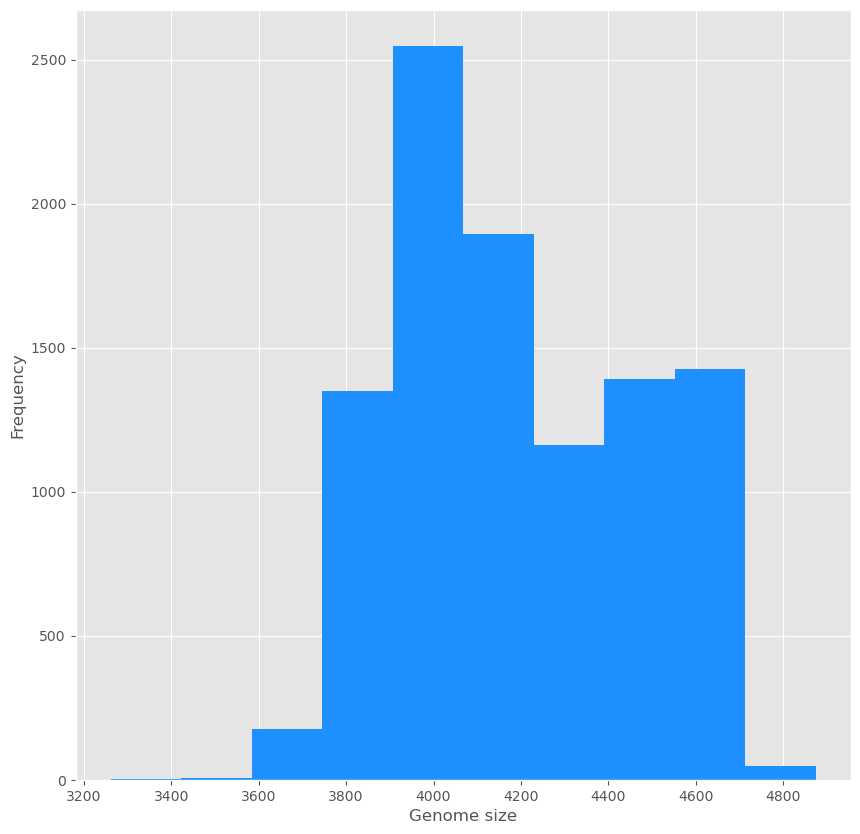

In [59]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_8_new_loss_enhanced_model.pdf", format="pdf", bbox_inches="tight")

In [60]:
binary_generated_samples.sum(axis=1).min()

3262.0

In [61]:
np.mean(binary_generated_samples.sum(axis=1))

4189.203

In [62]:
np.median(binary_generated_samples.sum(axis=1))

4133.0

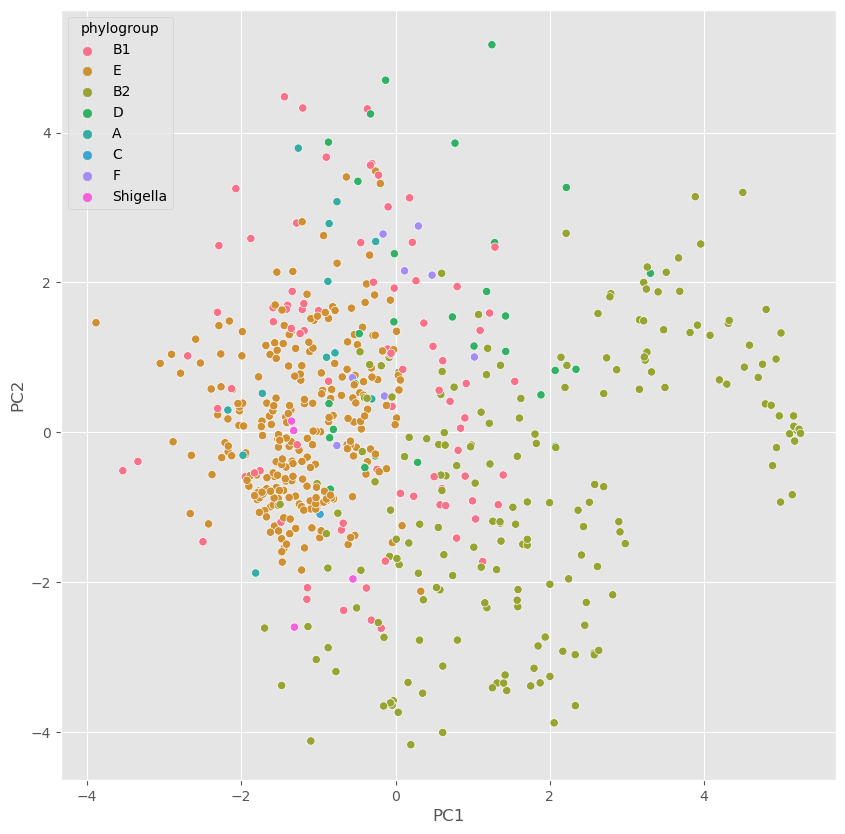

In [63]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

------

In [64]:
# Load trained model 
input_dim = 55039
hidden_dim = 512
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/3_bigdataset_newloss/3_bigdataset_newloss/11_non_linear_annealing/saved_KL_annealing_VAE_BD.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[4.0718313e-02 2.9706396e-06 7.9754007e-04 ... 8.9730573e-05
  8.2730745e-05 1.2328778e-04]
 [2.7237265e-04 1.3442783e-04 1.5811622e-05 ... 6.0103289e-06
  6.2867007e-06 1.0040564e-05]
 [4.1402841e-06 6.5054764e-06 7.5368138e-05 ... 8.5794978e-05
  8.1570179e-05 6.0410985e-05]
 ...
 [1.2109823e-04 3.6725207e-04 1.6150543e-05 ... 5.3770520e-05
  5.6772569e-05 6.5248867e-05]
 [3.4532249e-03 1.7619727e-04 1.9486036e-02 ... 9.2516624e-05
  8.7659173e-05 8.4921914e-05]
 [5.7387028e-06 7.1821714e-06 4.5047074e-07 ... 1.8919444e-04
  1.8682085e-04 1.5955933e-04]]


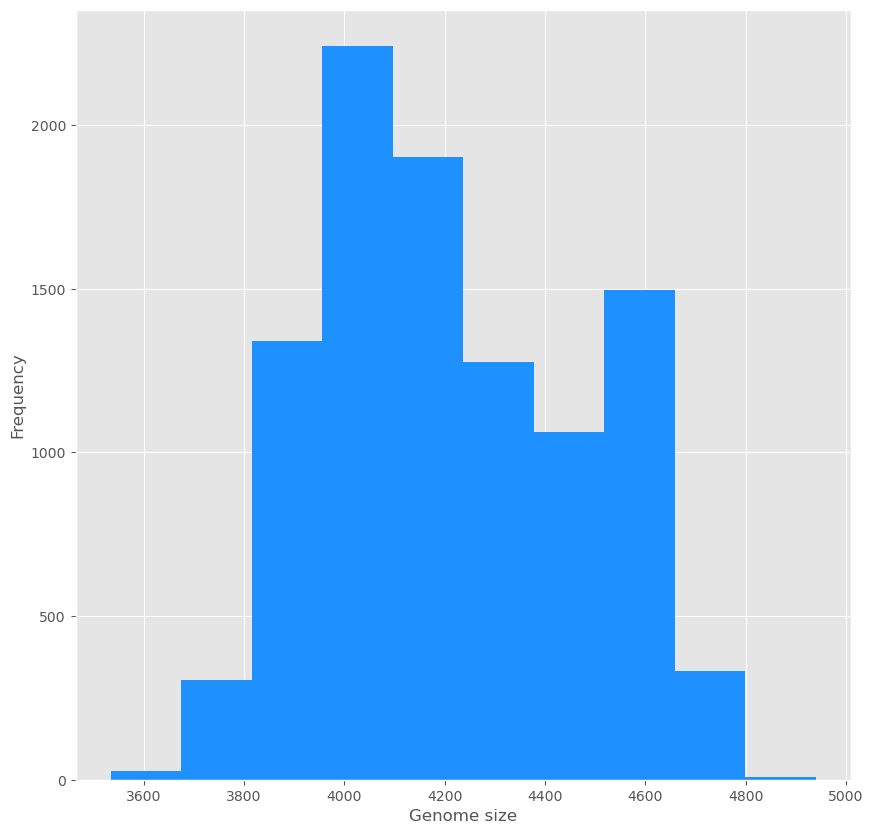

In [65]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_11_non_linear_annealing.pdf", format="pdf", bbox_inches="tight")

In [66]:
binary_generated_samples.sum(axis=1).min()

3535.0

In [67]:
np.mean(binary_generated_samples.sum(axis=1))

4213.5696

In [68]:
np.median(binary_generated_samples.sum(axis=1))

4168.0

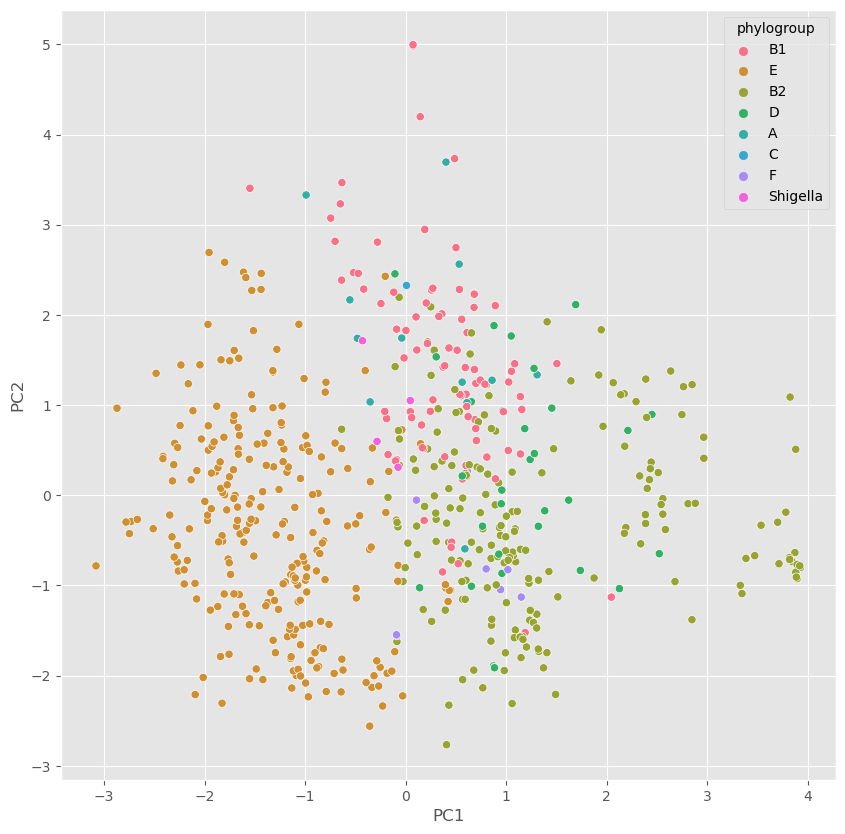

In [69]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [70]:
# Load trained model 
input_dim = 55039
hidden_dim = 512
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/3_bigdataset_newloss/3_bigdataset_newloss/13_add_genome_size/saved_KL_annealing_VAE_BD_100.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[3.34447855e-03 1.96044639e-04 7.75319713e-05 ... 5.83722576e-05
  6.12581935e-05 5.78189720e-05]
 [5.94183686e-04 4.00782119e-05 7.77282003e-06 ... 2.81372850e-05
  2.91291835e-05 3.13997843e-05]
 [2.17932947e-02 3.37229430e-05 7.47324011e-05 ... 1.09668159e-04
  1.10202054e-04 1.01778023e-04]
 ...
 [8.90762531e-05 4.99044909e-05 1.58234802e-03 ... 1.45099939e-05
  1.45290333e-05 2.80633503e-05]
 [1.36549346e-07 1.09273467e-04 1.85139996e-07 ... 5.15704087e-05
  5.33133971e-05 2.99702424e-05]
 [2.36161109e-02 6.28067995e-04 3.22329470e-05 ... 5.16837426e-05
  5.15641659e-05 4.71234707e-05]]


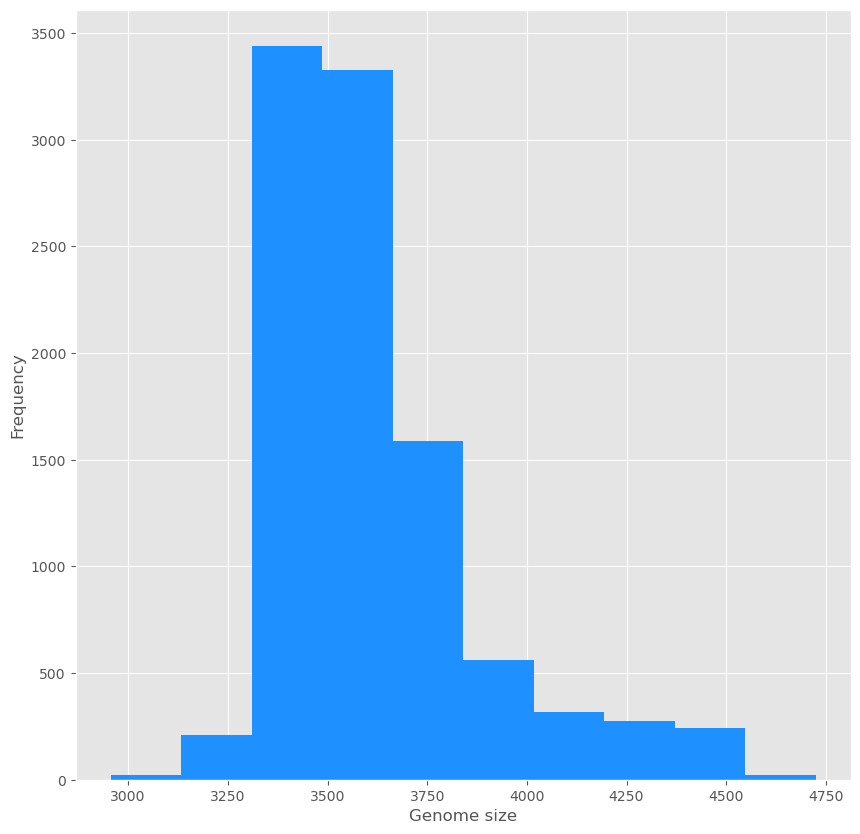

In [71]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_13_add_genome_size.pdf", format="pdf", bbox_inches="tight")

In [72]:
binary_generated_samples.sum(axis=1).min()

2957.0

In [73]:
np.mean(binary_generated_samples.sum(axis=1))

3614.1364

In [74]:
np.median(binary_generated_samples.sum(axis=1))

3548.0

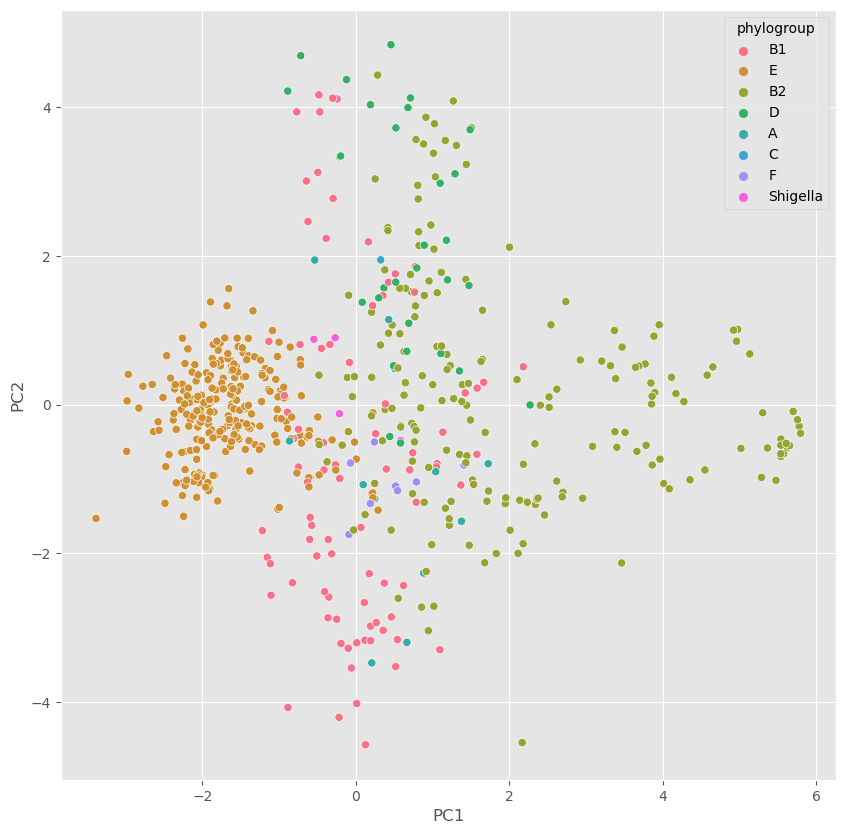

In [75]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [76]:
# Load trained model 
input_dim = 55039
hidden_dim = 512
latent_dim = 32

# changes layer norm layer to batch norm layer and 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('/Users/anastasiiashcherbakova/Desktop/3_bigdataset_newloss/3_bigdataset_newloss/14_genome_size_and_cyclic_annealing/saved_KL_annealing_VAE_BD.pt',  map_location=torch.device('cpu')))  
model.eval()  

# Generate 10 new samples
num_samples = 10000
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution because the latent space follows normal distribution 
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples (binary):\n", binary_generated_samples)
print("\n")
print("Generated samples (sigmoid function output):\n", generated_samples)


Generated samples (binary):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Generated samples (sigmoid function output):
 [[4.0780692e-04 3.4157027e-04 7.3459866e-03 ... 6.9549758e-05
  7.2227609e-05 4.9395505e-05]
 [1.1189831e-01 2.2788020e-06 4.7229420e-05 ... 7.1792252e-05
  7.4276984e-05 8.9152731e-05]
 [5.5871764e-04 5.2268768e-04 1.4095850e-06 ... 2.7185224e-04
  2.6830449e-04 2.0193894e-04]
 ...
 [3.8864329e-03 5.4277618e-05 2.5988291e-05 ... 2.7344676e-04
  2.7754868e-04 2.4613709e-04]
 [4.4359653e-03 1.2394416e-05 7.6758508e-05 ... 1.4708521e-04
  1.4718693e-04 1.6862992e-04]
 [1.6236624e-02 6.4133230e-05 1.6446368e-06 ... 4.4961722e-05
  4.3926433e-05 3.6614114e-05]]


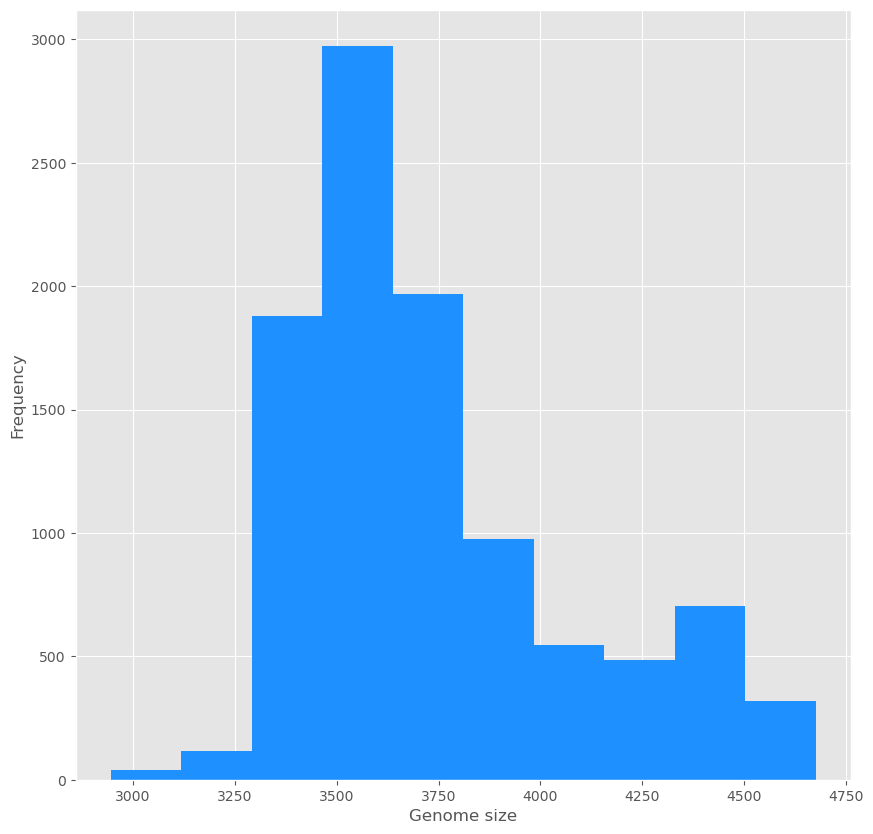

In [77]:
plt.figure(figsize=(10,10))
plt.hist(binary_generated_samples.sum(axis=1), bins=10, color='dodgerblue')
plt.xlabel('Genome size')
plt.ylabel('Frequency')
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/sampling_10000_genome_size_distribution_14_genome_size_and_cyclic_annealing.pdf", format="pdf", bbox_inches="tight")

In [78]:
binary_generated_samples.sum(axis=1).min()

2946.0

In [79]:
np.mean(binary_generated_samples.sum(axis=1))

3736.2775

In [80]:
np.median(binary_generated_samples.sum(axis=1))

3637.0

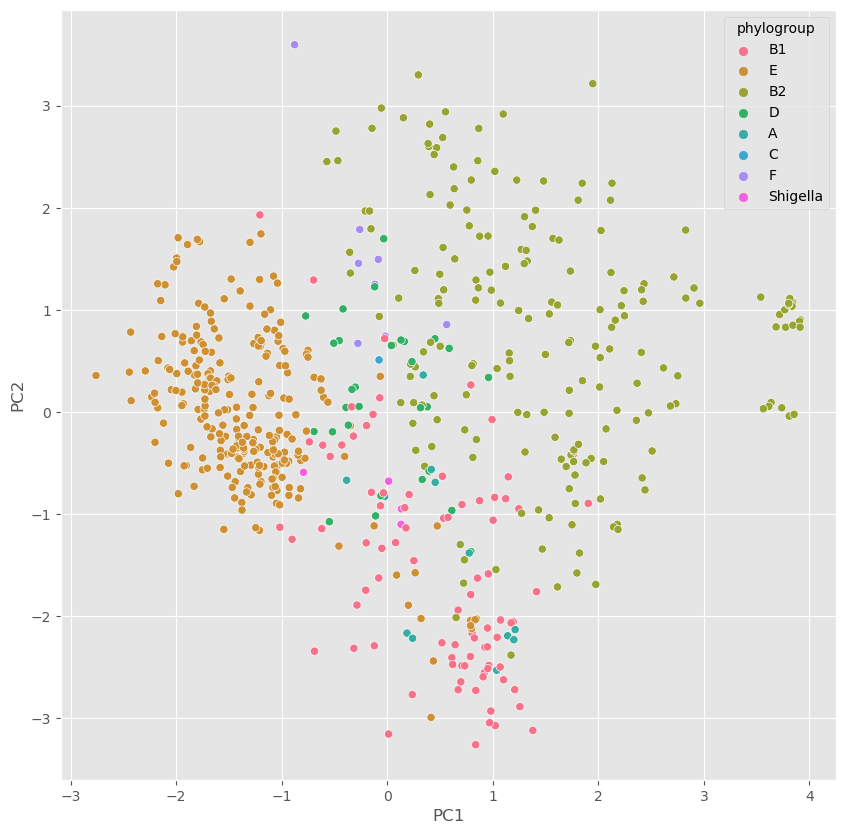

In [81]:
latents = get_latent_variables(model, test_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['phylogroup'] = test_phylogroups

# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = df_pca['phylogroup'], data=df_pca)
# plt.savefig("figures/pca_latent_space_visualisation_full_dataset_test_set.pdf", format="pdf", bbox_inches="tight")
plt.show()